# Modules

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **AQI Prediction**

Loading the data

In [ ]:
train=pd.read_excel("/content/drive/MyDrive/datasets/AQI_ttnagar_Epics.xlsx")

KeyboardInterrupt: 

In [ ]:
train['Date'] = pd.to_datetime(train['Date'])

Dropping the Categorical features and date

In [ ]:

train = train.drop(["AQI Status"], axis = 1)
train = train.drop(["Benzene (µg/m3)"], axis = 1)

In [ ]:
train.head()

,Date,AQI No.,PM10 (µg/m3),PM2.5 (µg/m3),NO (µg/m3),NO2 (µg/m3),NOX (ppb),CO (mg/m3),SO2 (µg/m3),NH3 (µg/m3),Ozone (µg/m3)
0,2019-10-29,86,160.05,83.07,10.78,55.73,38.41,1.39,18.16,15.63,53.31
1,2019-10-30,69,116.85,57.42,5.85,34.42,23.06,1.01,14.68,13.12,36.17
2,2019-10-31,161,93.18,43.68,9.25,34.32,25.77,1.11,12.85,12.64,40.36
3,2019-11-01,177,162.19,77.20,15.93,38.45,33.41,1.15,8.37,21.93,36.60
4,2019-11-02,111,181.03,74.08,13.59,73.80,50.30,2.09,9.97,14.08,44.61


Cleaning the NaNs

In [ ]:
train.isna().sum()

Date              0
AQI No.           0
PM10 (µg/m3)      0
PM2.5 (µg/m3)     3
NO (µg/m3)       29
NO2 (µg/m3)      29
NOX (ppb)        29
CO (mg/m3)        5
SO2 (µg/m3)       0
NH3 (µg/m3)      29
Ozone (µg/m3)     0
dtype: int64

In [ ]:
train = train.dropna()

In [ ]:
figure = px.line(train, x="Date",
                 y="AQI No.",
                 title='AQI over time')
figure.show()

In [ ]:
train["Date"] = pd.to_datetime(train["Date"], format = '%Y-%m-%d')
train['year'] = train['Date'].dt.year
train["month"] = train["Date"].dt.month
print(train.head())

        Date  AQI No.  PM10 (µg/m3)  PM2.5 (µg/m3)  NO (µg/m3)  NO2 (µg/m3)  \
0 2019-10-29       86        160.05          83.07       10.78        55.73   
1 2019-10-30       69        116.85          57.42        5.85        34.42   
2 2019-10-31      161         93.18          43.68        9.25        34.32   
3 2019-11-01      177        162.19          77.20       15.93        38.45   
4 2019-11-02      111        181.03          74.08       13.59        73.80   

   NOX (ppb)  CO (mg/m3)  SO2 (µg/m3)  NH3 (µg/m3)  Ozone (µg/m3)  year  month  
0      38.41        1.39        18.16        15.63          53.31  2019     10  
1      23.06        1.01        14.68        13.12          36.17  2019     10  
2      25.77        1.11        12.85        12.64          40.36  2019     10  
3      33.41        1.15         8.37        21.93          36.60  2019     11  
4      50.30        2.09         9.97        14.08          44.61  2019     11  


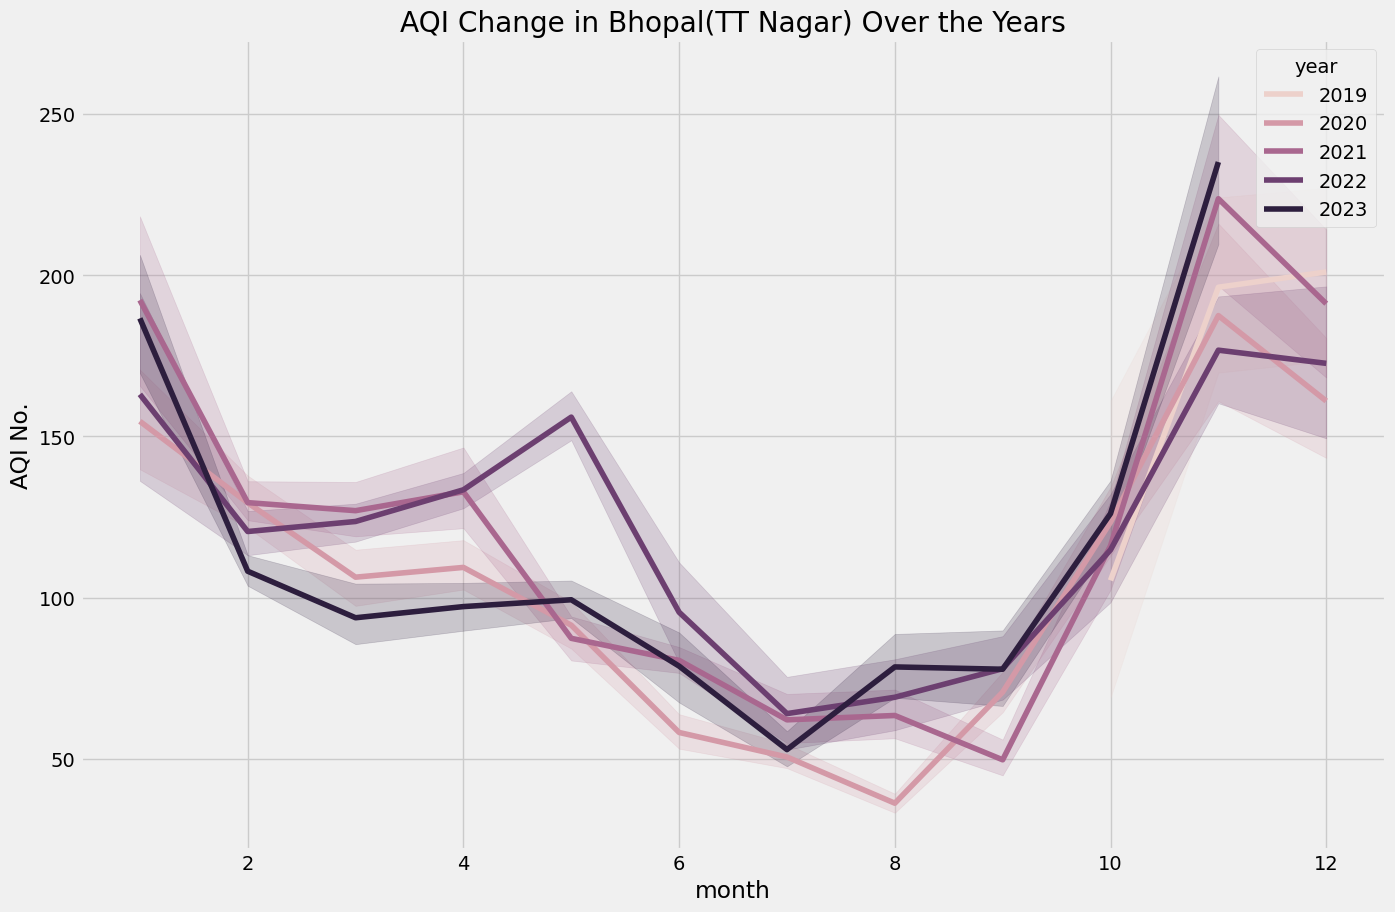

In [ ]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15, 10))
plt.title("AQI Change in Bhopal(TT Nagar) Over the Years")
sns.lineplot(data = train, x='month', y='AQI No.', hue='year')
plt.show()

In [ ]:
forecast_AQI = train.rename(columns = {"Date": "ds",
                                       "AQI No.": "y"})
print(forecast_AQI)

             ds    y  PM10 (µg/m3)  PM2.5 (µg/m3)  NO (µg/m3)  NO2 (µg/m3)  \
0    2019-10-29   86        160.05          83.07       10.78        55.73   
1    2019-10-30   69        116.85          57.42        5.85        34.42   
2    2019-10-31  161         93.18          43.68        9.25        34.32   
3    2019-11-01  177        162.19          77.20       15.93        38.45   
4    2019-11-02  111        181.03          74.08       13.59        73.80   
...         ...  ...           ...            ...         ...          ...   
1416 2023-11-17  288        158.44         100.43        1.20        25.95   
1417 2023-11-18  307        114.50          69.28        1.24        25.31   
1418 2023-11-19  308         13.75           5.09        0.36         1.75   
1419 2023-11-20  276        365.19         285.68       46.18       120.16   
1420 2023-11-21  272        114.11          46.59        3.78        25.66   

      NOX (ppb)  CO (mg/m3)  SO2 (µg/m3)  NH3 (µg/m3)  Ozone (µ

In [ ]:
model = Prophet()
model.fit(forecast_AQI)
forecasts_aqi = model.make_future_dataframe(periods=365)
predictions_aqi = model.predict(forecasts_aqi)
plot_plotly(model, predictions_aqi)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9_6qjpac/bohpltnw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9_6qjpac/kl6odzx2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63000', 'data', 'file=/tmp/tmp9_6qjpac/bohpltnw.json', 'init=/tmp/tmp9_6qjpac/kl6odzx2.json', 'output', 'file=/tmp/tmp9_6qjpac/prophet_model8n51mw0z/prophet_model-20240430160713.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:07:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:07:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
print("Enter the date: ")
specific_date = pd.to_datetime(input())

specific_date_prediction = predictions_aqi[predictions_aqi['ds'] == specific_date]

# Print the prediction for the specific date
if not specific_date_prediction.empty:
    print("AQI Prediction for {}: {}".format(specific_date, specific_date_prediction['yhat'].values[0]))
else:
    print("No prediction available for the specified date.")

Enter the date: 


KeyboardInterrupt: Interrupted by user

# **Wheather Forecasting**

Loading the data

In [ ]:

data = pd.read_csv("/content/drive/MyDrive/datasets/DailyDelhiClimateTrain_delhi_2017.csv")
print(data.head())

         date   meantemp   humidity  wind_speed  meanpressure
0  2013-01-01  10.000000  84.500000    0.000000   1015.666667
1  2013-01-02   7.400000  92.000000    2.980000   1017.800000
2  2013-01-03   7.166667  87.000000    4.633333   1018.666667
3  2013-01-04   8.666667  71.333333    1.233333   1017.166667
4  2013-01-05   6.000000  86.833333    3.700000   1016.500000


In [ ]:
data.tail()

,date,meantemp,humidity,wind_speed,meanpressure
1457,2016-12-28,17.217391,68.043478,3.547826,1015.565217
1458,2016-12-29,15.238095,87.857143,6.000000,1016.904762
1459,2016-12-30,14.095238,89.666667,6.266667,1017.904762
1460,2016-12-31,15.052632,87.000000,7.325000,1016.100000
1461,2017-01-01,10.000000,100.000000,0.000000,1016.000000


In [ ]:
print(data.describe())

          meantemp     humidity   wind_speed  meanpressure
count  1462.000000  1462.000000  1462.000000   1462.000000
mean     25.495521    60.771702     6.802209   1011.104548
std       7.348103    16.769652     4.561602    180.231668
min       6.000000    13.428571     0.000000     -3.041667
25%      18.857143    50.375000     3.475000   1001.580357
50%      27.714286    62.625000     6.221667   1008.563492
75%      31.305804    72.218750     9.238235   1014.944901
max      38.714286   100.000000    42.220000   7679.333333


In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1462 non-null   object 
 1   meantemp      1462 non-null   float64
 2   humidity      1462 non-null   float64
 3   wind_speed    1462 non-null   float64
 4   meanpressure  1462 non-null   float64
dtypes: float64(4), object(1)
memory usage: 57.2+ KB
None


In [ ]:
figure = px.line(data, x="date",
                 y="meantemp",
                 title='Mean Temperature in Delhi Over the Years')
figure.show()


In [ ]:
figure = px.line(data, x="date",
                 y="humidity",
                 title='Humidity in Delhi Over the Years')
figure.show()

In [ ]:
figure = px.line(data, x="date",
                 y="wind_speed",
                 title='Wind Speed in Delhi Over the Years')
figure.show()

In [ ]:
figure = px.scatter(data_frame = data, x="humidity",
                    y="meantemp", size="meantemp",
                    trendline="ols",
                    title = "Relationship Between Temperature and Humidity")
figure.show()

In [ ]:
data["date"] = pd.to_datetime(data["date"], format = '%Y-%m-%d')
data['year'] = data['date'].dt.year
data["month"] = data["date"].dt.month
print(data.head())

        date   meantemp   humidity  wind_speed  meanpressure  year  month
0 2013-01-01  10.000000  84.500000    0.000000   1015.666667  2013      1
1 2013-01-02   7.400000  92.000000    2.980000   1017.800000  2013      1
2 2013-01-03   7.166667  87.000000    4.633333   1018.666667  2013      1
3 2013-01-04   8.666667  71.333333    1.233333   1017.166667  2013      1
4 2013-01-05   6.000000  86.833333    3.700000   1016.500000  2013      1


## Weather Predictions

### Prediction of Mean Temperature



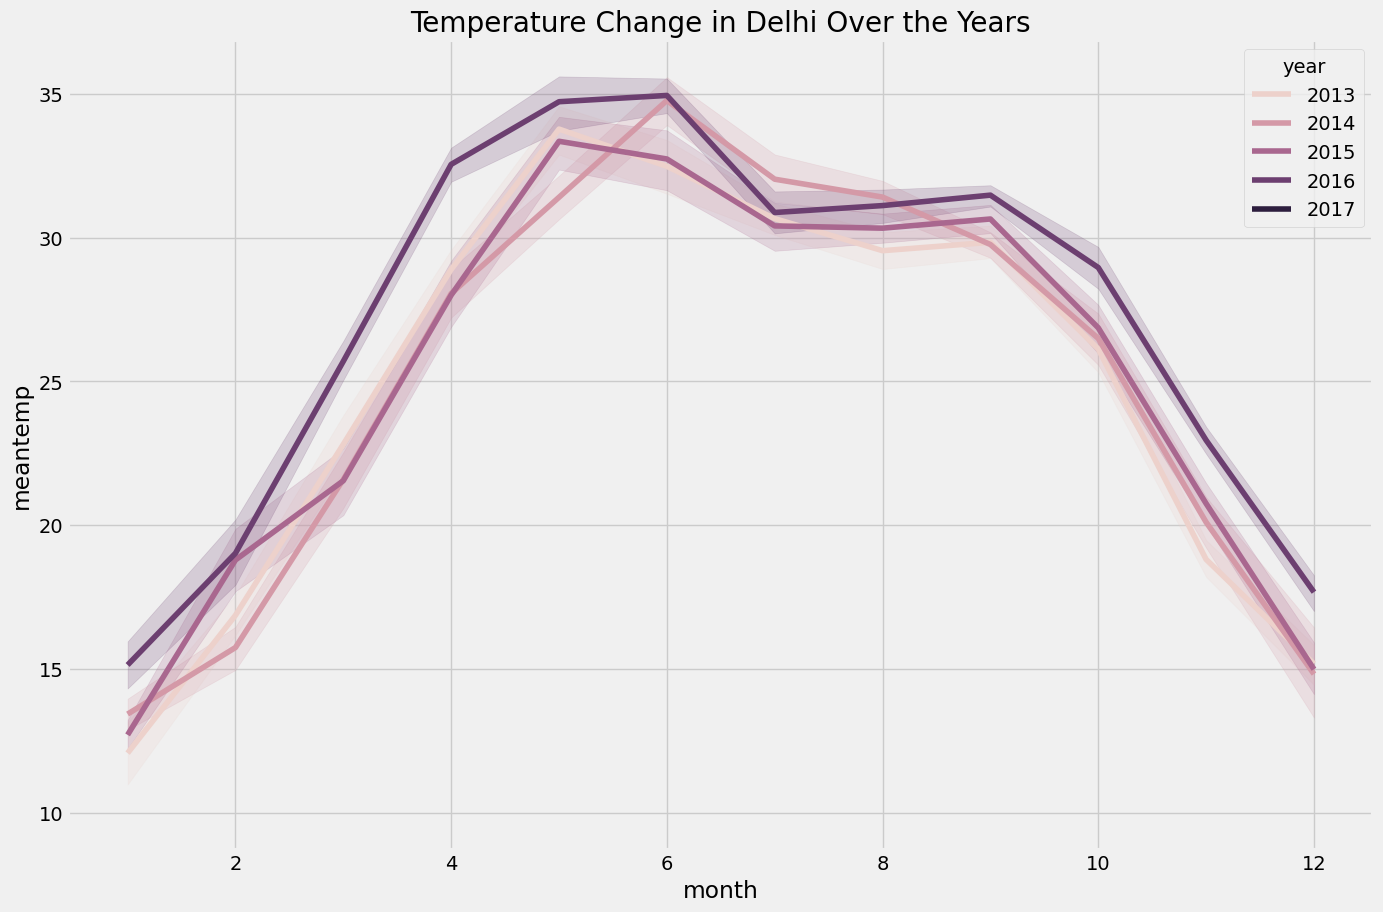

In [ ]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15, 10))
plt.title("Temperature Change in Delhi Over the Years")
sns.lineplot(data = data, x='month', y='meantemp', hue='year')
plt.show()

In [ ]:
forecast_data_meanTemp = data.rename(columns = {"date": "ds",
                                       "meantemp": "y"})
forecast_data_meanTemp.drop(['humidity', 'wind_speed', 'meanpressure'], axis = 1)
print(forecast_data_meanTemp)
#make new fore_cast data variable for humidity and

             ds          y    humidity  wind_speed  meanpressure  year  month
0    2013-01-01  10.000000   84.500000    0.000000   1015.666667  2013      1
1    2013-01-02   7.400000   92.000000    2.980000   1017.800000  2013      1
2    2013-01-03   7.166667   87.000000    4.633333   1018.666667  2013      1
3    2013-01-04   8.666667   71.333333    1.233333   1017.166667  2013      1
4    2013-01-05   6.000000   86.833333    3.700000   1016.500000  2013      1
...         ...        ...         ...         ...           ...   ...    ...
1457 2016-12-28  17.217391   68.043478    3.547826   1015.565217  2016     12
1458 2016-12-29  15.238095   87.857143    6.000000   1016.904762  2016     12
1459 2016-12-30  14.095238   89.666667    6.266667   1017.904762  2016     12
1460 2016-12-31  15.052632   87.000000    7.325000   1016.100000  2016     12
1461 2017-01-01  10.000000  100.000000    0.000000   1016.000000  2017      1

[1462 rows x 7 columns]


In [ ]:
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly
model = Prophet()
model.fit(forecast_data_meanTemp)
forecasts_meanTemp = model.make_future_dataframe(periods=365)
predictions_meantemp = model.predict(forecasts_meanTemp)
plot_plotly(model, predictions_meantemp)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9_6qjpac/y2z0jsrb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9_6qjpac/tlvu0cfy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=90574', 'data', 'file=/tmp/tmp9_6qjpac/y2z0jsrb.json', 'init=/tmp/tmp9_6qjpac/tlvu0cfy.json', 'output', 'file=/tmp/tmp9_6qjpac/prophet_modelk_v3ae9u/prophet_model-20240430161547.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:15:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:15:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
print("Enter the date: ")
specific_date = pd.to_datetime(input())

specific_date_prediction = predictions_meantemp[predictions_meantemp['ds'] == specific_date]

# Print the prediction for the specific date
if not specific_date_prediction.empty:
    print("Mean Temperature Prediction for {}: {}".format(specific_date, specific_date_prediction['yhat'].values[0]))
else:
    print("No prediction available for the specified date.")

Enter the date: 
2-2-2017
Mean Temperature Prediction for 2017-02-02 00:00:00: 17.630560112837827


### Prediction of Humidity

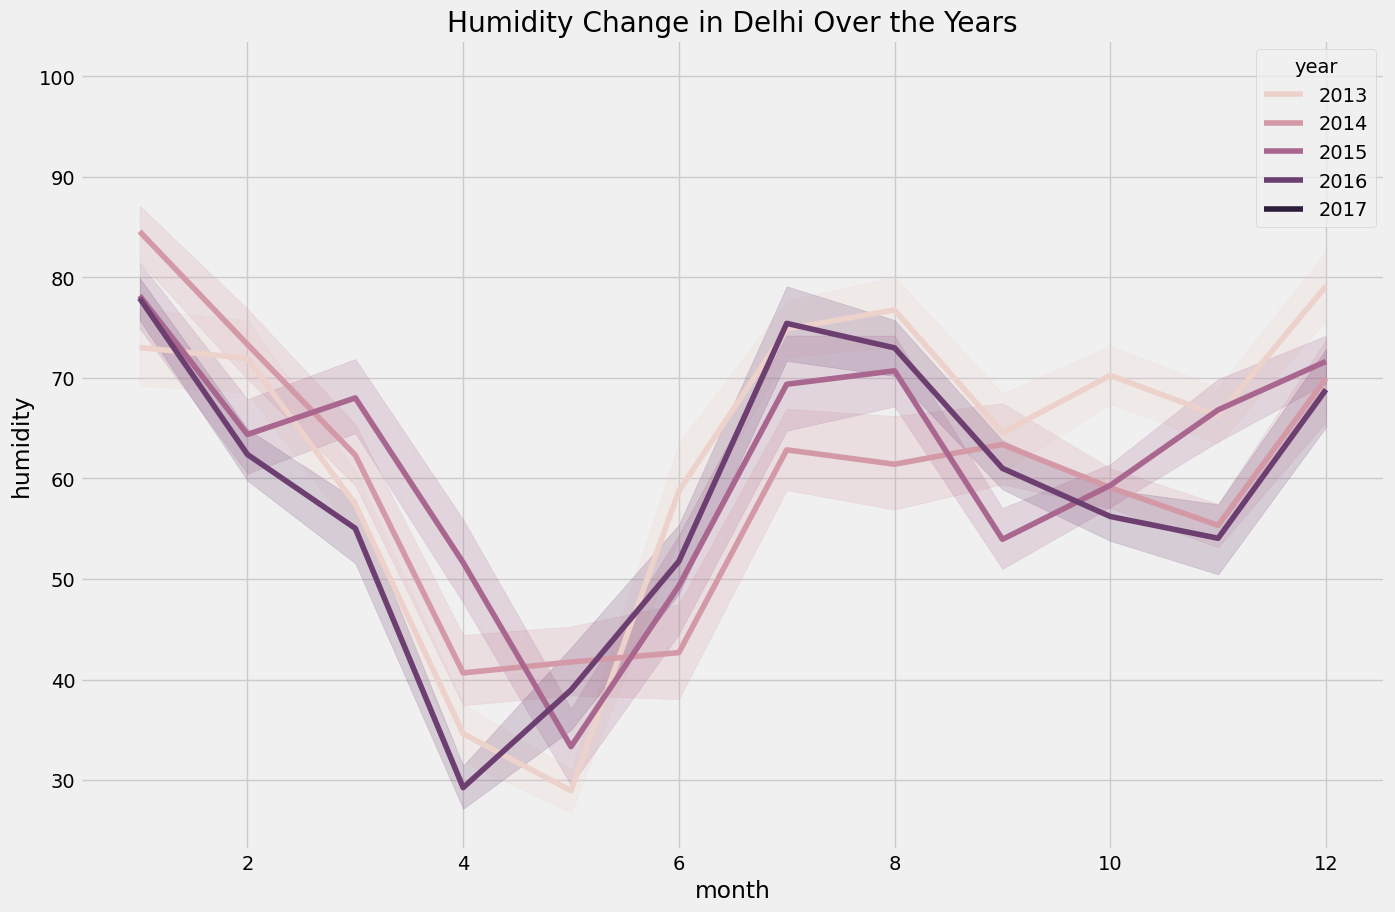

In [ ]:
def humidity_over_years():
  plt.style.use('fivethirtyeight')
  plt.figure(figsize=(15, 10))
  plt.title("Humidity Change in Delhi Over the Years")
  sns.lineplot(data = data, x='month', y='humidity', hue='year')
  return(plt.show())
humidity_over_years()

In [ ]:
forecast_data = data.rename(columns = {"date": "ds",
                                       "humidity": "y"})
print(forecast_data)

             ds   meantemp           y  wind_speed  meanpressure  year  month
0    2013-01-01  10.000000   84.500000    0.000000   1015.666667  2013      1
1    2013-01-02   7.400000   92.000000    2.980000   1017.800000  2013      1
2    2013-01-03   7.166667   87.000000    4.633333   1018.666667  2013      1
3    2013-01-04   8.666667   71.333333    1.233333   1017.166667  2013      1
4    2013-01-05   6.000000   86.833333    3.700000   1016.500000  2013      1
...         ...        ...         ...         ...           ...   ...    ...
1457 2016-12-28  17.217391   68.043478    3.547826   1015.565217  2016     12
1458 2016-12-29  15.238095   87.857143    6.000000   1016.904762  2016     12
1459 2016-12-30  14.095238   89.666667    6.266667   1017.904762  2016     12
1460 2016-12-31  15.052632   87.000000    7.325000   1016.100000  2016     12
1461 2017-01-01  10.000000  100.000000    0.000000   1016.000000  2017      1

[1462 rows x 7 columns]


In [ ]:
def pred_humidity():
  model = Prophet()
  model.fit(forecast_data)
  forecasts_humid = model.make_future_dataframe(periods=365)
  global predictions_humid
  predictions_humid = model.predict(forecasts_humid)
  return(plot_plotly(model, predictions_humid))
pred_humidity()

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9_6qjpac/410zouvi.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9_6qjpac/stms4za3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=84225', 'data', 'file=/tmp/tmp9_6qjpac/410zouvi.json', 'init=/tmp/tmp9_6qjpac/stms4za3.json', 'output', 'file=/tmp/tmp9_6qjpac/prophet_model92aiq26l/prophet_model-20240430160844.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:08:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:08:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


specific date prediction

In [ ]:
print("Enter the date: ")
specific_date = pd.to_datetime(input())

specific_date_prediction = predictions[predictions_humid['ds'] == specific_date]
if not specific_date_prediction.empty:
    print("Humidity Prediction for {}: {}".format(specific_date, specific_date_prediction['yhat'].values[0]))
else:
    print("No prediction available for the specified date.")

Enter the date: 


KeyboardInterrupt: Interrupted by user

### Prediction of wind speed

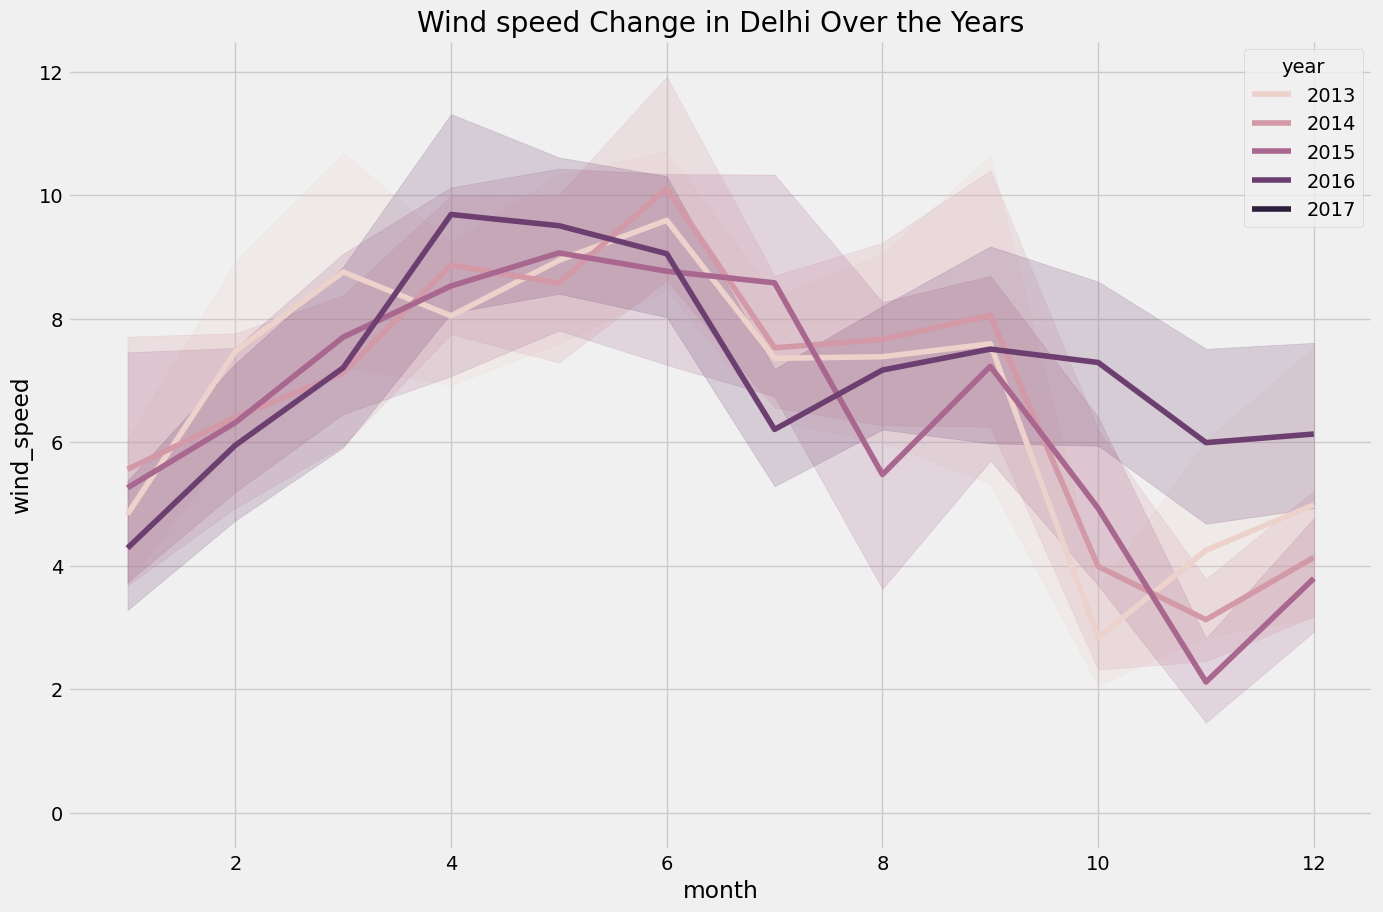

In [ ]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15, 10))
plt.title("Wind speed Change in Delhi Over the Years")
sns.lineplot(data = data, x='month', y='wind_speed', hue='year')
plt.show()

In [ ]:
forecast_data_windspeed = data.rename(columns = {"date": "ds",
                                       "wind_speed": "y"})
print(forecast_data_windspeed)

             ds   meantemp    humidity         y  meanpressure  year  month
0    2013-01-01  10.000000   84.500000  0.000000   1015.666667  2013      1
1    2013-01-02   7.400000   92.000000  2.980000   1017.800000  2013      1
2    2013-01-03   7.166667   87.000000  4.633333   1018.666667  2013      1
3    2013-01-04   8.666667   71.333333  1.233333   1017.166667  2013      1
4    2013-01-05   6.000000   86.833333  3.700000   1016.500000  2013      1
...         ...        ...         ...       ...           ...   ...    ...
1457 2016-12-28  17.217391   68.043478  3.547826   1015.565217  2016     12
1458 2016-12-29  15.238095   87.857143  6.000000   1016.904762  2016     12
1459 2016-12-30  14.095238   89.666667  6.266667   1017.904762  2016     12
1460 2016-12-31  15.052632   87.000000  7.325000   1016.100000  2016     12
1461 2017-01-01  10.000000  100.000000  0.000000   1016.000000  2017      1

[1462 rows x 7 columns]


In [ ]:
model = Prophet()
model.fit(forecast_data_windspeed)
forecasts_windspeed = model.make_future_dataframe(periods=365)
predictions_windspeed = model.predict(forecasts_windspeed)
plot_plotly(model, predictions_windspeed)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9_6qjpac/vag8r0_i.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9_6qjpac/d2f__7e8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=81784', 'data', 'file=/tmp/tmp9_6qjpac/vag8r0_i.json', 'init=/tmp/tmp9_6qjpac/d2f__7e8.json', 'output', 'file=/tmp/tmp9_6qjpac/prophet_model9wl944_d/prophet_model-20240430161113.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:11:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:11:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
print("Enter the date: ")
specific_date = pd.to_datetime(input())

specific_date_prediction = predictions_windspeed[predictions_windspeed['ds'] == specific_date]

# Print the prediction for the specific date
if not specific_date_prediction.empty:
    print("Wind speed Prediction for {}: {}".format(specific_date, specific_date_prediction['yhat'].values[0]))
else:
    print("No prediction available for the specified date.")

Enter the date: 
3-4-2017
Wind speed Prediction for 2017-03-04 00:00:00: 8.424401613268456


# Data Input from the Drone

In [ ]:
def drone_input_aqi():
  train[]
  aqi_new_values = float(input()) #Date	AQI No.	PM10 (µg/m3)	PM2.5 (µg/m3)	NO (µg/m3)	NO2 (µg/m3)	NOX (ppb)	CO (mg/m3)	SO2 (µg/m3)	NH3 (µg/m3)	Ozone (µg/m3)
  train.append(aqi_new_values)
def drone_input_weather():
  weather_new_values = float(input()) #date	meantemp	humidity	wind_speed	meanpressure
  data.append(weather_new_values)

# Things left to do -